# 5장. 선형 회귀 모델: 먼저 긋고 수정하기

## 2. 파이썬 코딩으로 확인하는 선형 회귀

### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 데이터 준비

In [ ]:
# 공부 시간 X와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

### 3. 데이터 분포 확인

In [ ]:
# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

### 4. 실행을 위한 변수 설정

In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03 # 적절한 학습률은 손실 함수가 안정적으로 감소하면서도 빠르게 수렴할 수 있는 값이어야 합니다.

# 몇 번 반복될지 설정합니다.
epochs = 2001

### 5. 경사 하강법

In [ ]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):                  # 에포크 수 만큼 반복

    y_pred = a * x + b                   # 예측 값을 구하는 식입니다.
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

### 6. 그래프 확인

In [ ]:
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입하여 그래프를 그립니다.
y_pred = a * x + b

# 그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

## 4. 파이썬 코딩으로 확인하는 다중 선형 회귀

### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 데이터 준비

In [ ]:
# 공부 시간 x1과 과외 시간 x2, 그 성적 y의 넘파이 배열을 만듭니다.
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

### 3. 데이터 분포 확인

In [ ]:
# 데이터의 분포를 그래프로 나타냅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

### 4. 실행을 위한 변수 설정

In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

# 학습률을 정합니다.
lr = 0.01

# 몇 번 반복될지 설정합니다.
epochs = 2001

### 5. 경사 하강법

In [ ]:
# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n=len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):                  # 에포크 수 만큼 반복

    y_pred = a1 * x1 + a2 * x2 + b       # 예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

    a1_diff = (2/n) * sum(-x1 * (error)) # 오차 함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차 함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

In [ ]:
# 실제 점수와 예측된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

## 5-1. 텐서플로에서 실행하는 선형 회귀 모델

### 1. 환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [ ]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

### 3. 모델 실행

In [ ]:
model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다.
model.add(Dense(1, input_dim=1, activation='linear'))   # activation='linear'**는 **항등 함수(identity function)**입니다.

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다.
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step - loss: 6747.9453
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 1829.3359
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1101.5336
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 989.2906
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 967.4928
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 959.0133
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 952.5242
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 946.3613
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 940.2802
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 934.2445
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 928.2488
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 922.2921
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 916.3741
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 910.4943
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━

### 4. 그래프로 확인

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


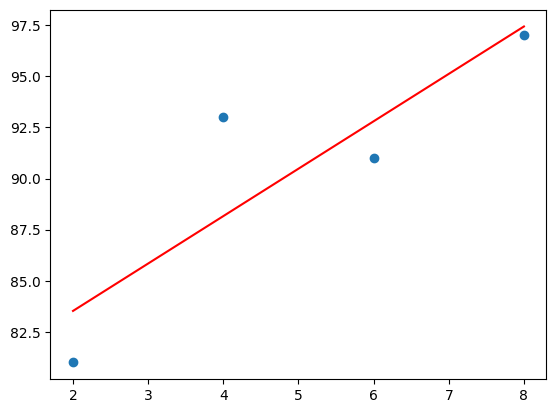

In [ ]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r') # model.predict(x)는 머신러닝 또는 딥러닝 모델에서 학습된 모델을 사용하여 새로운 입력 데이터 x에 대한 예측 값을 반환하는 함수입니다.
plt.show()

### 5. 모델 테스트

In [ ]:
import tensorflow as tf

# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
#prediction = model.predict([hour]) #텐서플로 2.9.0 까지만 가능

input_data = tf.constant([[hour]]) # 텐서플로 버전업으로 인한 수정
prediction = model.predict(input_data)[0][0]  # 텐서플로 버전업으로 인한 수정

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction))     # 텐서(Tensor)**는 다차원 배열을 의미함!

# TensorFlow에서는 데이터를 다룰 때 텐서(tensor)라는 형식으로 처리해야 합니다.
# tf.constant()는 파이썬 데이터를 텐서로 변환하는 함수입니다. 여기서는 공부한 시간 hour을 2차원 배열 [[7]]의 형태로 변환하여 텐서로 만듭니다.
# 왜 2차원 배열인가?: 대부분의 딥러닝 모델은 입력 데이터를 2차원 배열(즉, 행렬)로 받습니다. 여기서 [[7]]은 하나의 샘플 데이터이며, 이 안에 있는 7은 공부 시간을 나타냅니다.
# 입력이 하나라도 2차원 배열로 변환하여 처리하는 것이 일반적입니다.
# 파이썬의 일반적인 데이터 구조(예: 리스트, 튜플, 배열 등)와 **텐서(Tensor)**의 차이점은 주로 연산 성능, 차원 지원 및 특수 기능에 있습니다.
# 텐서는 딥러닝 프레임워크(TensorFlow, PyTorch 등)에서 사용하는 고성능 연산용 다차원 배열을 의미합니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다


## 5-2 텐서플로에서 실행하는 다중 선형 회귀 모델

### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [ ]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

### 3. 모델 실행

In [ ]:
model = Sequential()

# 입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다.
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd' ,loss='mse')

model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - loss: 6990.9595
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1356.5967
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 954.8264
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 921.0992
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 913.2924
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 907.3446
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 901.5628
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 895.8280
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 890.1314
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 884.4722
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 878.8497
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 873.2640
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 867.7148
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 862.2016
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

### 4. 모델 테스트

In [ ]:
import tensorflow as tf

# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
private_class = 4
#prediction = model.predict([[hour, private_class]])  #텐서플로 2.9.0 까지만 가능

input_data = tf.constant([[hour, private_class]])  # 텐서플로 버전업으로 인한 수정
prediction = model.predict(input_data)[0][0]  # 텐서플로 버전업으로 인한 수정

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다
